In [4]:
# Generation of the training datasets

import matplotlib.pyplot as plt
import numpy as np
import torch

from pathlib import Path
import os
data_dir = str(Path.cwd()) + "/../data/gauss/"
print("Data dir: " + os.path.abspath(data_dir))

import seaborn as sns
sns.set_theme()

np.random.seed(seed=0)

class gen_gauss_data():
    def __init__(self):
        self.a_range = [-10, 10]
        self.b_range = [0, 10]
        self.x_range = [0, 10]
        self.x_bins = 100
        self.Dataset: torch.utils.data.dataset.TensorDataset
        
        self.x = np.linspace(min(self.x_range), max(self.x_range), self.x_bins)
    
    def gauss(self, a, b):
        return a * np.exp(-np.square((self.x-b))/2)
    
    def gen_gauss_array(self, len_array = 50000):
        
        data_X = []
        data_Y = []
        
        for i in range(len_array):
            a = np.random.uniform(low=self.a_range[0], high=self.a_range[1])
            b = np.random.uniform(low=self.b_range[0], high=self.b_range[1])
                        
            data_X.append(self.gauss(a,b))
            data_Y.append(np.array([a,b]))
            
        self.data_X = np.array(data_X)
        self.data_Y = np.array(data_Y)
        
        self.setup_dataset()
        
    def visualize_dataset(self, plot_num = 1):
        row = int(np.sqrt(plot_num))
        column = row + 1
        
        fig, axs = plt.subplots(column,row, figsize=(6.4*row, 4.8*column))
        axs = axs.flatten()
        for i in range(plot_num):
            axs[i].plot(self.x, self.data_X[i])
            axs[i].set_title("a:{:.2f}, b:{:.2f}".format(*self.data_Y[i]))
            axs[i].set_ylabel("y")
            axs[i].set_xlabel("x")
        
        fig.tight_layout()
        plt.savefig("visualization_of_dataset.png")
    
    def histgram_dataset(self):
        row = len(self.data_Y[0])
        column = 1
        
        fig, axs = plt.subplots(column,row, figsize=(6.4*row, 4.8*column))
        axs = axs.flatten()
        for i in range(row):
            axs[i].hist(self.data_Y[:,i])
            axs[i].set_title("Y[{}]".format(i))
            axs[i].set_ylabel("Counts")
            axs[i].set_xlabel("Value")
        
        fig.tight_layout()
        plt.savefig("histogram_of_dataset.png")
    
    def setup_dataset(self):
        X = torch.tensor(dataset.data_X, dtype=torch.float32)
        y = torch.tensor(dataset.data_Y, dtype=torch.float32)
        self.Dataset = torch.utils.data.TensorDataset(X, y)
        
    
    def save(self, data_dir=data_dir):
        np.save(data_dir + "/data_X.npy", self.data_X)
        np.save(data_dir + "/data_Y.npy", self.data_Y)
        torch.save(self.Dataset, data_dir + "/gauss.pt")
        
    
    def load(self, path_x="./data_X.npy", path_y="./data_y.npy"):
        self.data_X = np.load(path_x)
        self.data_Y = np.load(path_y)
        


Data dir: /home/ryuichi/machine_learning/nngauss/data/gauss


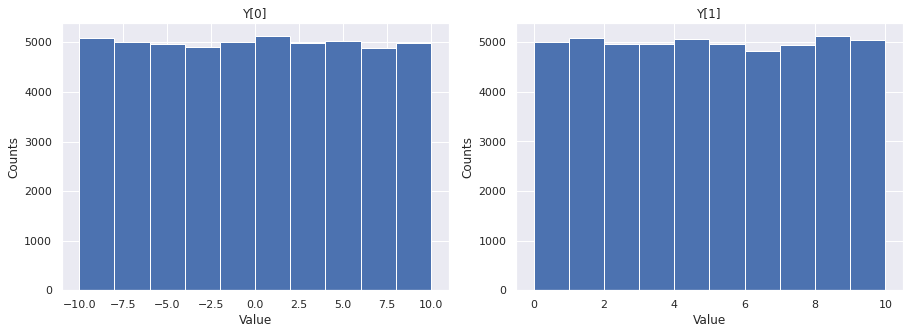

In [5]:
dataset = gen_gauss_data()
dataset.gen_gauss_array()
dataset.histgram_dataset()

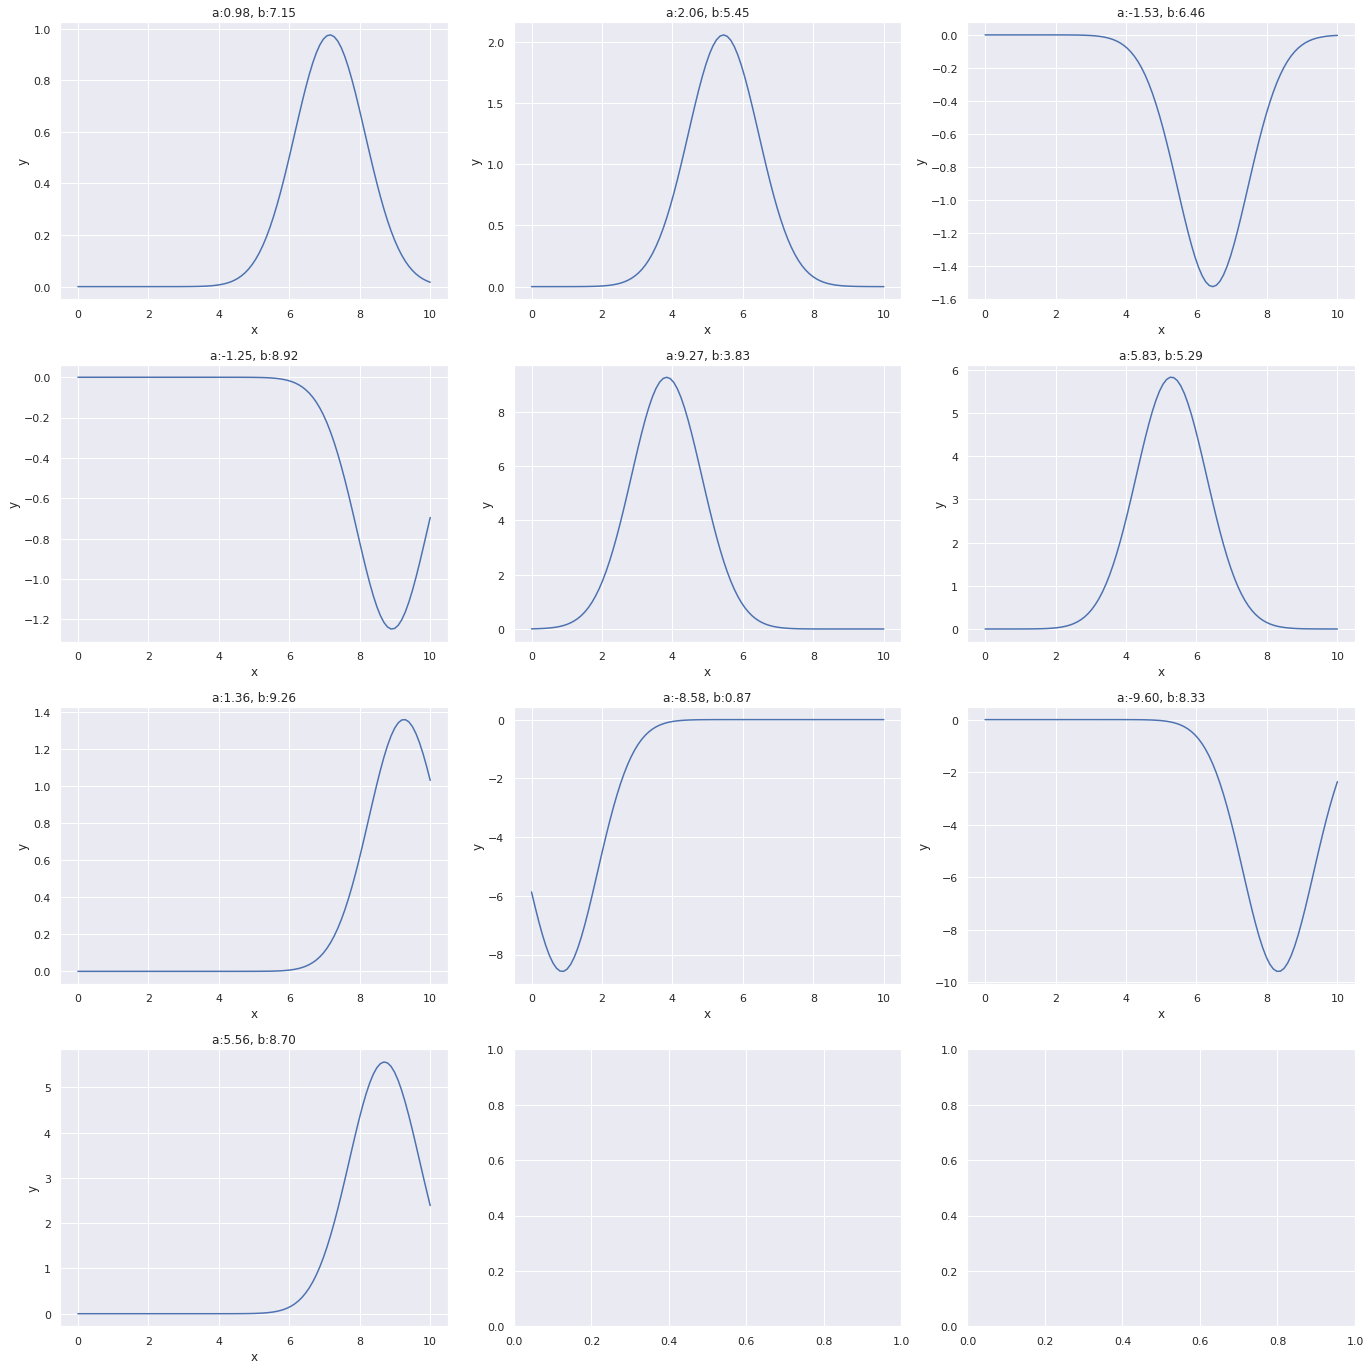

In [6]:
dataset.visualize_dataset(10)

In [7]:
dataset.save()

In [8]:
import torch
data_test = torch.load(data_dir + "/gauss_test.pt")
data_train = torch.load(data_dir + "/gauss_train.pt")
data_val = torch.load(data_dir + "/gauss_val.pt")

split_datasets = [data_train[:][1].numpy(), data_val[:][1].numpy(), data_test[:][1].numpy()]

In [9]:
def plot_histgrams(data_lists):
    row = len(data_lists[0][0])
    column = len(data_lists)
    
    fig, axs = plt.subplots(column,row, figsize=(6.4*row, 4.8*column))
    for i in range(column):
        for j in range(row):
            axs[i][j].hist(data_lists[i][:,j])
            axs[i][j].set_title("Dataset[{}] Y[{}]".format(i, j))
            axs[i][j].set_ylabel("Counts")
            axs[i][j].set_xlabel("Value")
    
    fig.tight_layout()
    plt.savefig("histogram_of_splited_datasets.png")

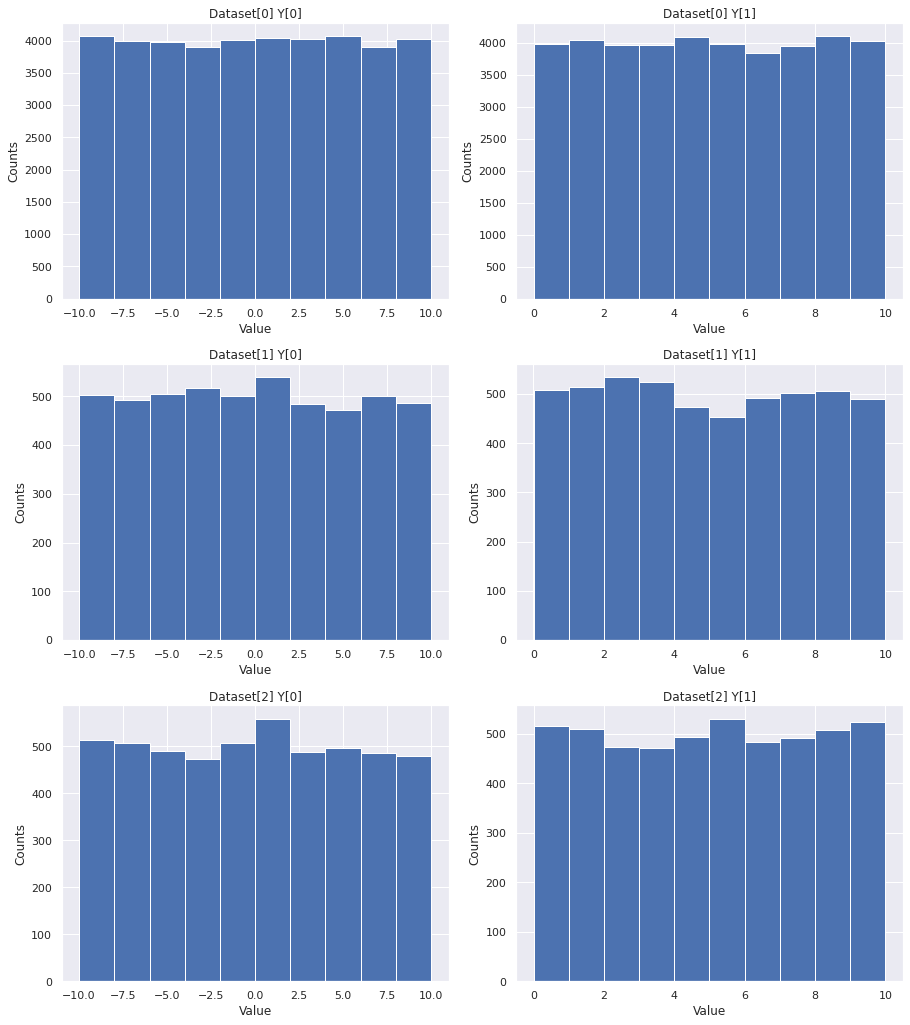

In [10]:
plot_histgrams(split_datasets)